In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
!pip install nba_api

In [13]:
from nba_api.stats.static import teams

In [15]:
nba_teams = teams.get_teams()
nba_teams[0:4]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002}]

In [16]:
#need to convert this list of dictiionaries to a single dictionary
def converter(listDict):
    keys = listDict[0].keys()
    final = {key:[] for key in keys}
    for d in listDict:
        for key,value in d.items():
            final[key].append(value)
    return final

In [17]:
data = converter(nba_teams)
df = pd.DataFrame(data)
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [19]:
df_warriors = df[df['nickname']=="Warriors"]
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [27]:
id_warriors = df_warriors[["id"]].values[0][0]
id_warriors

1610612744

In [26]:
from nba_api.stats.endpoints import leaguegamefinder

In [29]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)

In [35]:
#gamefinder.get_json()
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612744,GSW,Golden State Warriors,1522400070,2024-07-21,GSW @ MIA,L,199,99,...,0.760,13.0,34.0,47.0,26,6,2,15,21,-3.0
1,22024,1610612744,GSW,Golden State Warriors,1522400059,2024-07-19,GSW @ OKC,W,199,90,...,0.810,9.0,28.0,37.0,23,7,3,18,17,9.2
2,22024,1610612744,GSW,Golden State Warriors,1522400045,2024-07-17,GSW @ CLE,W,199,96,...,0.810,9.0,36.0,45.0,23,8,1,18,12,6.8
3,22024,1610612744,GSW,Golden State Warriors,1522400023,2024-07-14,GSW vs. CHI,W,199,92,...,0.769,12.0,28.0,40.0,21,9,6,16,20,6.6
4,22024,1610612744,GSW,Golden State Warriors,1522400015,2024-07-13,GSW vs. PHX,W,199,90,...,0.750,12.0,34.0,46.0,22,11,7,19,20,15.0


In [39]:
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR']

In [40]:
games_home['PLUS_MINUS'].mean()

3.375

In [41]:
games_away['PLUS_MINUS'].mean()

-1.7212121212121212

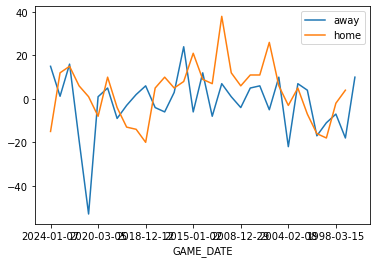

In [43]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

In [44]:
print(games_home['PTS'].mean())

print(games_away['PTS'].mean())

107.875
103.24242424242425


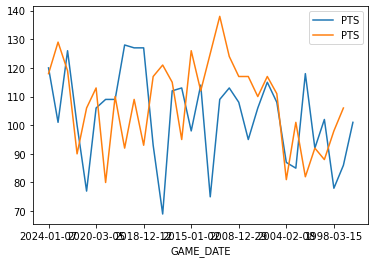

In [45]:
fig2, ax2 = plt.subplots()

games_away.plot(x='GAME_DATE',y='PTS', ax=ax2)
games_home.plot(x='GAME_DATE',y='PTS', ax=ax2)
ax.legend(["away", "home"])
plt.show()